<a href="https://colab.research.google.com/github/sohyun329/ML_Study/blob/main/XGBoost_%EC%BB%A4%ED%94%8C%EC%84%B1%EC%82%AC%EC%97%AC%EB%B6%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost
- 랜덤 포레스트는 각 트리를 독립적으로 만드는 알고리즘이다. 반면 부스팅은 순차적으로 트리를 만들어 이전 트리로부터 더 나은 트리를 만들어내는 알고리즘이다.
- 부스팅 알고리즘은 트리 모델을 기반으로 한 최신 알고리즘 중 하나로, 랜덤 포레스트보다 훨씬 빠른 속도와 더 좋은 예측 능력을 보여준다.
- XGBoost, LightGBM, CatBoost 등이 있다.
- 그 중 XGBoost는 손실 함수뿐만 아니라 모형 복잡도까지 고려한다.
- 장점 :
  - 예측 속도가 상당히 빠르며, 예측력 또한 좋다.
  - 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보여준다.
- 단점 :
  - 복잡한 모델인 만큼, 해석에 어려움이 있다.
  - 더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다롭다.
- 유용한 곳
  - 종속변수가 연속형, 범주형 데이터 모두 사용 가능
  - 이미지나 자연어가 아닌 표로 정리된 데이터의 경우, 거의 모든 상황에 활용할 수 있다.


## 1. 라이브러리 및 데이터 불러오기, 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
pd.options.display.max_columns=40

In [4]:
data

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,70.0,0.0,15.0,15.0,0.0,0.0,3.0,5.0,5.0,5.0,NaN,NaN,0.64,10.0,NaN,2.0,5.0,0.0,0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,70.0,0.0,15.0,15.0,0.0,0.0,4.0,6.0,8.0,4.0,4.0,NaN,0.71,10.0,NaN,4.0,4.0,0.0,0
8375,1,male,25.0,29.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,4.0,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,NaN,6.0,5.0,0.0,0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,70.0,0.0,15.0,15.0,0.0,0.0,4.0,6.0,5.0,4.0,NaN,5.0,0.62,10.0,NaN,5.0,5.0,0.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [6]:
round(data.describe(),2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


## 2. 전처리 : 결측치 처리

In [7]:
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


In [8]:
data = data.dropna(subset=['pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests',
           'attractive_important','sincere_important','intellicence_important','funny_important','ambtition_important','shared_interests_important'])

## 3. 전처리 : 피처 엔지니어링

- 나이
  - 남성이 연상이면 양수, 여자가 연상이면 음수

In [9]:
def age_gap(x):
  if x['age'] == -99 : return -99
  elif x['age_o'] == -99 : return -99
  elif x['gender'] == 'female':
    return x['age_o'] - x['age']
  else:
    return x['age'] - x['age_o']

In [10]:
data['age_gap'] = data.apply(age_gap, axis=1)

<ipython-input-10-f33ebb8a5f92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_gap'] = data.apply(age_gap, axis=1)


In [11]:
data['age_gap_abs'] = abs(data['age_gap'])

<ipython-input-11-62915e4aa0b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_gap_abs'] = abs(data['age_gap'])


- 인종

In [12]:
def same_race(x):
  if x['race'] == -99:
    return -99
  elif x['race_o'] == -99:
    return -99
  elif x['race'] == x['race_o']:
    return 1
  else:
    return -1

In [13]:
data['same_race'] = data.apply(same_race, axis=1)

<ipython-input-13-ca39790e2d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['same_race'] = data.apply(same_race, axis=1)


In [14]:
def same_race_point(x):
  if x['same_race'] == -99:
    return -99
  else:
    return x['same_race']*x['importance_same_race']

In [15]:
data['same_race_point'] = data.apply(same_race_point, axis=1)

<ipython-input-15-e2f4d2b36ce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['same_race_point'] = data.apply(same_race_point, axis=1)


- attractive, sincere 등에 대한 평가/중요도 변수

In [16]:
def rating(data, importance, score):
  if data[importance] == -99:
    return -99
  elif data[score] == -99:
    return -99
  else:
    return data[importance]*data[score]

In [17]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [18]:
partner_imp = data.columns[8:14] # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26] # 본인의 중요도
my_rate_partner = data.columns[26:32]

In [19]:
# 상대방 관련 새 변수 이름을 저장하는 리스트
new_label_partner = ['attractive_p','sincere_partner_p','intelligence_p','funny_p','ambition_p','shared_interests_p']

# 본인 관련 새 변수 이름을 저장하는 리스트
new_label_me = ['attractive_m','sincere_partner_m','intelligence_m','funny_m','ambition_m','shared_interests_m']

In [20]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
  data[i] = data.apply(lambda x:rating(x,j,k),axis=1)

for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
  data[i] = data.apply(lambda x:rating(x,j,k),axis=1)

<ipython-input-20-09bbb2a1b433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.apply(lambda x:rating(x,j,k),axis=1)
<ipython-input-20-09bbb2a1b433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.apply(lambda x:rating(x,j,k),axis=1)
<ipython-input-20-09bbb2a1b433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [21]:
data = pd.get_dummies(data, columns=['gender','race','race_o'],drop_first=True)

## 4. 모델링 및 평가

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match',axis=1),data['match'],test_size=0.2, random_state=100)

In [23]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [24]:
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,pred)

0.8640836408364083

In [25]:
print(confusion_matrix(y_test, pred))

[[1294   71]
 [ 150  111]]


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.61      0.43      0.50       261

    accuracy                           0.86      1626
   macro avg       0.75      0.69      0.71      1626
weighted avg       0.85      0.86      0.85      1626



- 1종 오류가 중요하면 : 정밀도
- 2종 오류가 중요하면 : 재현율
- 특별히 더 중요한 오류 유형이 없다면 : F1-score

## 5. 경사하강법
- 머신러닝이 학습시킬 때 최소의 오차를 찾는 방법
- 오차 함수에 대한 경사도(미분계수)를 기준으로 매개변수를 반복적으로 이동해가며 최소 오차를 찾는다
- 경사하강법과 보폭
  - 경사 부스팅의 핵심 개념 중 하나로, 모델이 어떻게 최소 오차가 되는 매개변수들을 학습하는지에 대한 방법
  - 오차식에 대한 미분계수를 통해 매개변수의 이동 방향과 보폭을 결정한다.
  - 보폭은 매개변수를 얼만큼씩 이동할지를 의미한다.


## 6. 하이퍼파라미터 튜닝 : 그리드 서치
- 그리드 서치를 이용하면 한 번 시도로 수백 가지 하이퍼파라미터 값을 시도해볼 수 있다.

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate':[0.01, 0.1, 0.3],
    'math_depth':[5,7,10],
    'subsample':[0.5,0.7,1],
    'n_estimators':[300,500,1000]
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1',cv=5)
gs_model.fit(X_train, y_train)
gs_model.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:06:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "math_depth" } are not used.

  warnings.warn(smsg, UserWarning)


{'learning_rate': 0.3, 'math_depth': 5, 'n_estimators': 500, 'subsample': 1}

In [28]:
pred = gs_model.predict(X_test)
accuracy_score(y_test, pred)

0.8696186961869619

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.64      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.77      0.69      0.72      1626
weighted avg       0.86      0.87      0.86      1626



## 7. 중요 변수 확인

In [31]:
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [32]:
model.feature_importances_

array([0.0150501 , 0.01067712, 0.01355151, 0.0104332 , 0.01154267,
       0.01292231, 0.01114746, 0.01524473, 0.01210041, 0.01491365,
       0.01610799, 0.05354002, 0.01472484, 0.0093215 , 0.03142323,
       0.01310859, 0.01929754, 0.01345318, 0.00853276, 0.0158101 ,
       0.01040777, 0.01304798, 0.0149029 , 0.02789709, 0.01433191,
       0.0117757 , 0.02704185, 0.01280076, 0.01464616, 0.01141722,
       0.01134288, 0.02126725, 0.06195104, 0.02075744, 0.02484812,
       0.01049252, 0.0108822 , 0.00474831, 0.01368629, 0.01266712,
       0.01233393, 0.01276592, 0.01467277, 0.01116102, 0.01009831,
       0.01301558, 0.01241751, 0.01418685, 0.01169167, 0.01167517,
       0.01073008, 0.00946067, 0.02839127, 0.01511874, 0.02854963,
       0.01323486, 0.03617053, 0.01153802, 0.01505795, 0.03391413],
      dtype=float32)

In [33]:
feature_imp = pd.DataFrame({'features':X_train.columns, 'value':model.feature_importances_})

In [34]:
feature_imp.head()

,features,value
0,has_null,0.015050
1,age,0.010677
2,age_o,0.013552
3,importance_same_race,0.010433
4,importance_same_religion,0.011543


<Axes: xlabel='value', ylabel='features'>

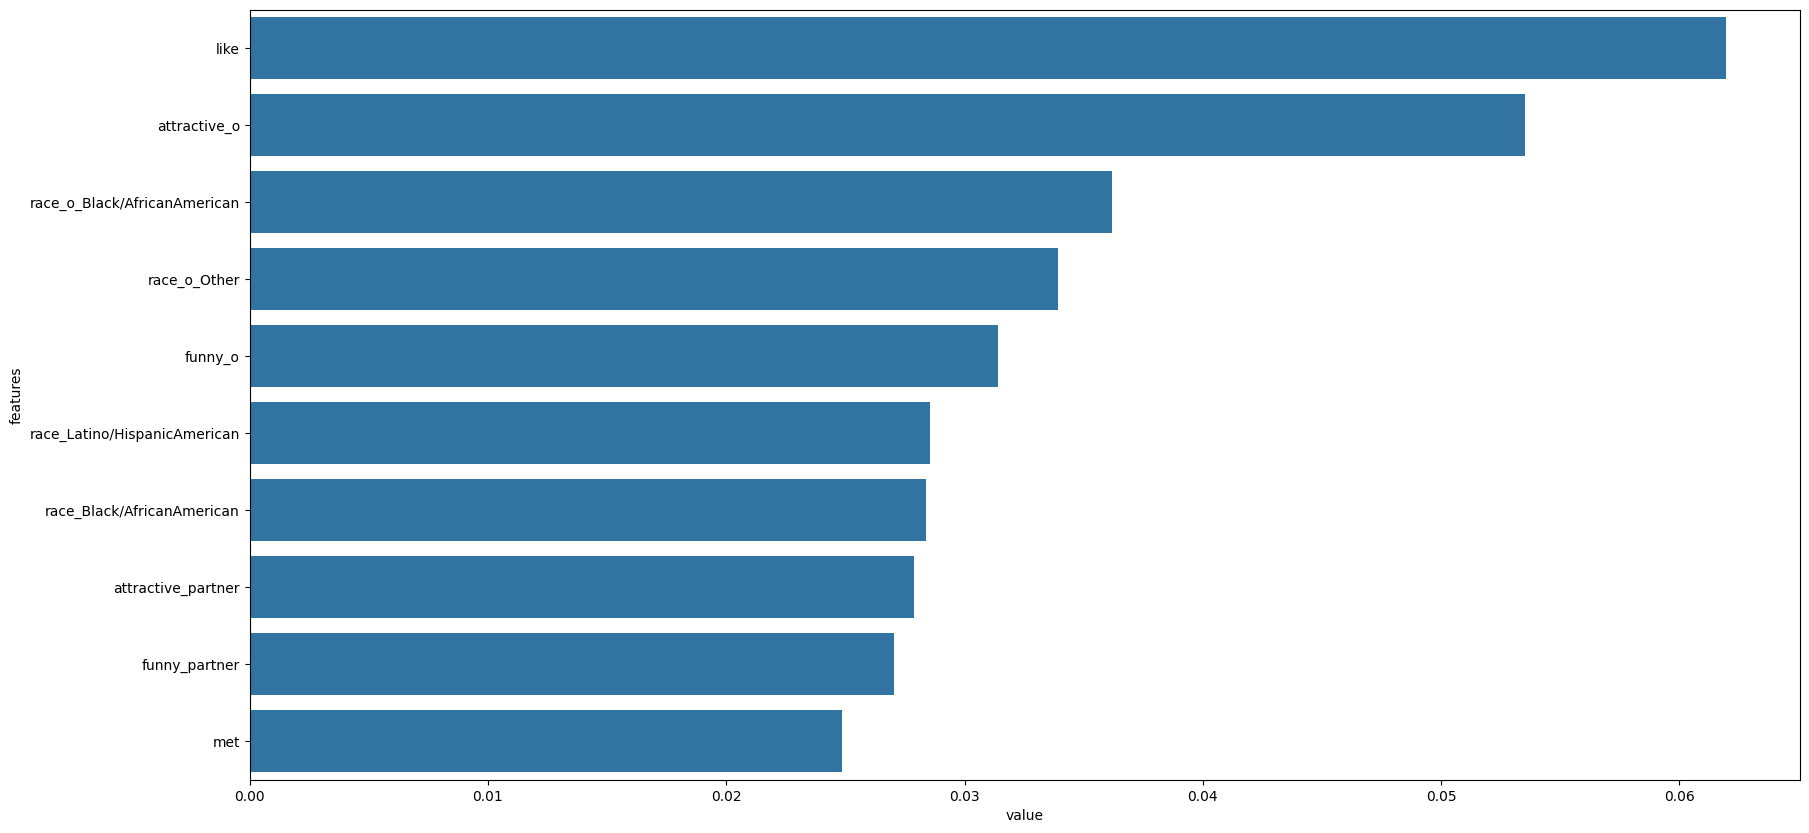

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='value',y='features',data=feature_imp.sort_values(by='value',ascending=False).head(10))

## 8. XGBoost
### 8.1 배깅
- 부트스트랩 훈련셋을 사용하는 트리 모델
- 부트스트랩 : 데이터의 일부분을 무작위로 반복 추출하는 방법
- 추출한 데이터의 여러 부분집합을 사용해 여러 트리를 만들어 오버피팅을 방지  

### 8.2 부스팅과 에이다부스트
- 여러 트리를 만드는 모델
- 랜덤 포레스트에서 각 트리는 독립적이나, 부스팅에서는 그렇지 않다.
- 랜덤 포레스트에서는 각 트리를 만들 때 이전에 만든 트리와 상관없이 새로운 데이터 부분집합과 변수 부분집합을 이용한다.
- 부스팅은 각 트리를 순차적으로 만들면서 이전 트리의 정보를 이용한다.
  - 부분집합을 이용해 첫 트리를 만들고 난 후, 해당 트리의 예측 결과를 반영하여
  - 두 번째 트리를 만들어서 첫 번째 트리와의 시너지 효과를 키운다.
- 에이다부스트 : 단계적으로 트리를 만들 때 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정한다.  

### 8.3 경사 부스팅과 XGBoost
- 경사 부스팅 : 경사하강법을 이용하여, 이전 모델의 에러를 기반으로 다음 트리를 만든다.
  - XGBoost, LightGBM, Catboost
- XGBoost
  - 기존 경사 부스팅보다 특별한 이유는 계산 성능 최적화와 알고리즘 개선을 함께 이루었기 때문
  - 병렬화, 분산 컴퓨팅, 캐시 최적화 등을 활용해 계산 속도가 훨씬 빠르다
  - 알고리즘 개선으로 경사하강법보다 더 발전된 형태로 최소값을 찾아낸다. (기존 경사하강법 : 접점의 기울기 이용, XGBoost : 2차 도함수 활용)
  - 정규화 하이퍼파라미터 지원
    - LASSO(L1)
    - Ridge(L2)
  - 가중치 분위수 스케치 : 최적의 분할을 찾기 위해 각 변수에 대한 히스토그램 생성. 히스토그램의 기둥의 경계는 최상의 분할지점을 찾기 위한 후보로 사용되는데, 가중 분위수 스케치에서는 각 기둥이 동일한 가중치를 갖도록 만들어진다.
  - 희소성 인식 (결측치 유연하게 처리)
